In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adv_data = pd.read_csv('advertising.csv')

In [3]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


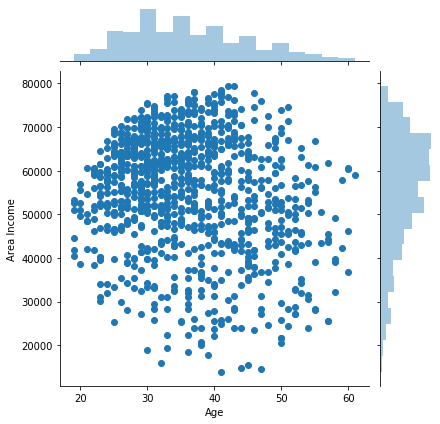

In [4]:
sns.jointplot(x='Age',y='Area Income',data=adv_data)

In [5]:
from sklearn.model_selection import train_test_split

In [18]:
adv_X=adv_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
adv_X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [21]:
adv_Y=adv_data['Clicked on Ad']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(adv_X, adv_Y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logMod= LogisticRegression()

In [25]:
logMod.fit(X_train,y_train)

/Users/vikassirwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logMod.coef_

array([[-5.24002872e-02,  2.53436783e-01, -1.70699524e-05,
        -2.65046418e-02,  2.17528485e-02]])

In [27]:
predictions=logMod.predict(X_test)

In [30]:
predictions[0]

1

In [29]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
506    0
342    0
485    1
711    0
133    0
Name: Clicked on Ad, Length: 330, dtype: int64

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.09090909090909091
MSE: 0.09090909090909091
RMSE: 0.30151134457776363


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

